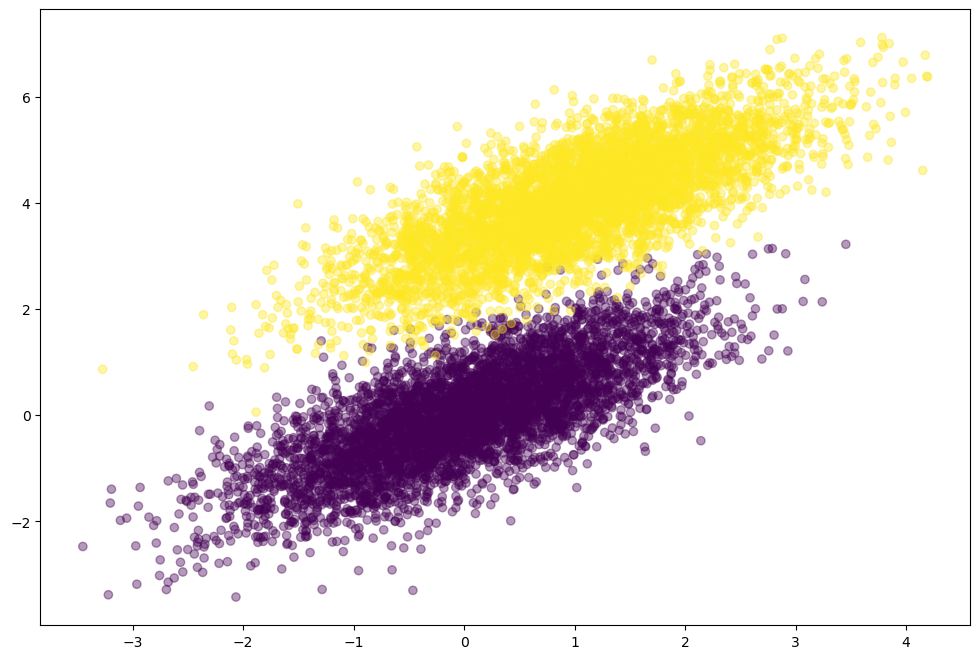

In [1]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75], [.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75], [.75, 1]], num_observations)

simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))

plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c=simulated_labels, alpha=.4)
plt.show()

Accuracy 0.9947


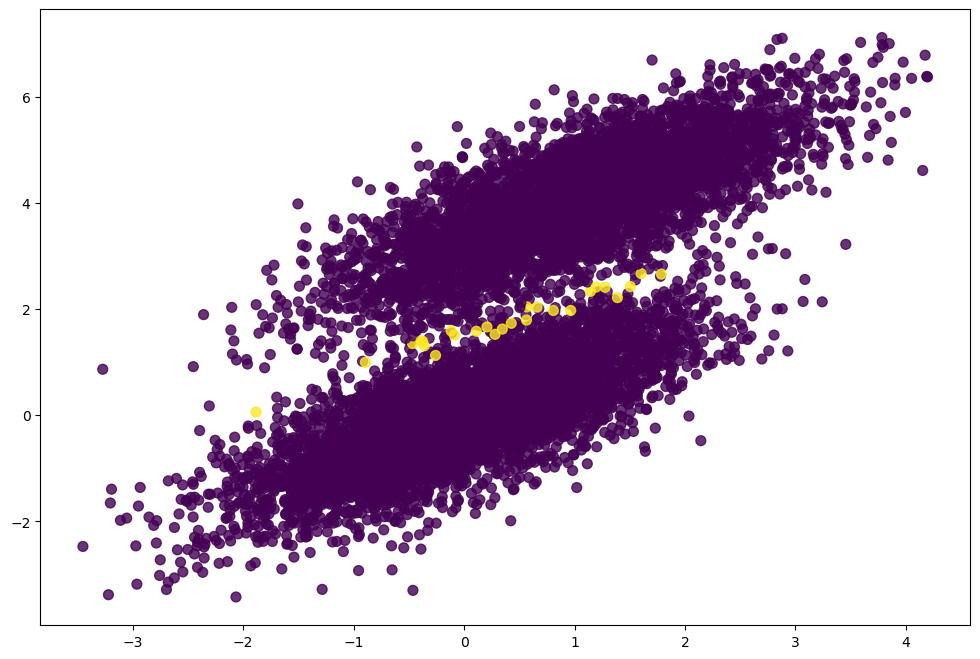

In [3]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))


def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll


def logistic_regression(features, target, num_steps, learning_rate, add_intercept=False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))

    weights = np.zeros(features.shape[1])

    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient

    return weights

weights = logistic_regression(simulated_separableish_features, simulated_labels,
                     num_steps=30000, learning_rate=5e-5, add_intercept=True)

data_with_intercept = np.hstack((np.ones((simulated_separableish_features.shape[0], 1)),
                                 simulated_separableish_features))
final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))

print('Accuracy {0}'.format((preds == simulated_labels).sum().astype(float) / len(preds)))

plt.figure(figsize = (12, 8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = preds == simulated_labels - 1, alpha = .8, s = 50)

plt.show()